<h1>How Bond Prices Vary with Interest Rates</h1>

<h4>Present Value of Bond at the time of emission:</h4>

\begin{equation}
    \begin{gathered}
        PV(bond) = PV(annuity\ of\ coupon\ payments) \\
        + PV(final\ payment\ of\ principal)\\
        = \frac{C}{(1+r_0)} + \frac{C}{(1+r_0)^2} + \cdot\cdot\cdot + \frac{C+P}{(1+r_0)^t}\\
        = \frac{P\cdot i}{(1+r_0)} + \frac{P\cdot i}{(1+r_0)^2} + \cdot\cdot\cdot + \frac{P\cdot i+P}{(1+r_0)^t}
    \end{gathered}
\end{equation}

$Where:$
\begin{split}
&PV &= Present\ Value\\
&C &= Coupon\ payment\\
&P &= Principal\\
&r_0 &= discount\ rate\ at\ the\ time\ of\ the\ bond\ emission\\
&t &= number\ of\ years\ to\ maturity\\
&i &= interest\ stipulated\ at\ the\ time\ of\ the\ bond\ emission\\
\end{split}

<h4>Face Value of Bond when the new interest rate is $r_1$:</h4>

\begin{equation}
    \begin{gathered}
        Face\ Value\ (bond) = PV(annuity\ of\ coupon\ payments)\\
        + PV(final\ payment\ of\ principal),\ discounted\ at\ the\ new\ discount\ rate\ r_1:\\
        FV = \frac{C}{(1+r_1)} + \frac{C}{(1+r_1)^2} + \cdot\cdot\cdot + \frac{C+P}{(1+r_1)^t}\\
        = \frac{P\cdot i}{(1+r_1)} + \frac{P\cdot i}{(1+r_1)^2} + \cdot\cdot\cdot + \frac{P\cdot i+P}{(1+r_1)^t}\\
        = \frac{FV\cdot r_1}{(1+r_1)} + \frac{FV\cdot r_1}{(1+r_1)^2} + \cdot\cdot\cdot + \frac{FV\cdot r_1+FV}{(1+r_1)^t}
    \end{gathered}
\end{equation}

$Where:\\
r_1 = new\ interest\ rate$

In [46]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

matplotlib.rcParams['figure.figsize'] = [16, 9]

<h4>Bond Prices vs Interest Rates Plot</h4>

In [37]:
P=100    # P: Principal = 100 $ (from 100 dollars we can easily extrapolate to any value, as 110$ = 110% of 100 and 90$ = 90% of 100)
i = 2    # i: Interest stipulated at the time of the bond's emission --> remind me to create a slider
t=5      # t: number of years to maturity --> create an interactive selector as well

In [38]:
r = np.arange(0.1,12.1,0.1)    # r: new interest rate, which can be higher or lower. Here I create an array of values from 0.1 to 12 with interval 0.1
r

array([ 0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ,  1.1,
        1.2,  1.3,  1.4,  1.5,  1.6,  1.7,  1.8,  1.9,  2. ,  2.1,  2.2,
        2.3,  2.4,  2.5,  2.6,  2.7,  2.8,  2.9,  3. ,  3.1,  3.2,  3.3,
        3.4,  3.5,  3.6,  3.7,  3.8,  3.9,  4. ,  4.1,  4.2,  4.3,  4.4,
        4.5,  4.6,  4.7,  4.8,  4.9,  5. ,  5.1,  5.2,  5.3,  5.4,  5.5,
        5.6,  5.7,  5.8,  5.9,  6. ,  6.1,  6.2,  6.3,  6.4,  6.5,  6.6,
        6.7,  6.8,  6.9,  7. ,  7.1,  7.2,  7.3,  7.4,  7.5,  7.6,  7.7,
        7.8,  7.9,  8. ,  8.1,  8.2,  8.3,  8.4,  8.5,  8.6,  8.7,  8.8,
        8.9,  9. ,  9.1,  9.2,  9.3,  9.4,  9.5,  9.6,  9.7,  9.8,  9.9,
       10. , 10.1, 10.2, 10.3, 10.4, 10.5, 10.6, 10.7, 10.8, 10.9, 11. ,
       11.1, 11.2, 11.3, 11.4, 11.5, 11.6, 11.7, 11.8, 11.9, 12. ])

In [39]:
C = P*(i/100)    # C: Constant Coupon to be payed each year
Coupons = [C/((1+(r/100))**t) for n in range(1, t+1)]   # array of arrays with all the values of the coupons at each t and r discounted at the PV  

In [40]:
sumCoupons = np.sum(Coupons, axis=0)    # For each r, summate all the discounted coupons along the t axis, from 1 to t ( for each r, compute sum(PV(C)) )

In [41]:
presValPrincipal = P/((1+(r/100))**t)    # For each r, discount Principal at PV

In [42]:
FV = sumCoupons + presValPrincipal    # FV: Face Value. Equals the sum of all discounted coupons + PV(P). We calculate one value for each new r
FV

array([109.45164616, 108.90656932, 108.36474667, 107.82615556,
       107.29077352, 106.75857827, 106.22954771, 105.70365989,
       105.18089306, 104.66122564, 104.14463619, 103.63110349,
       103.12060643, 102.61312412, 102.10863579, 101.60712087,
       101.10855893, 100.61292969, 100.12021306,  99.63038908,
        99.14343797,  98.65934007,  98.17807592,  97.69962617,
        97.22397164,  96.75109329,  96.28097225,  95.81358978,
        95.34892727,  94.88696628,  94.42768851,  93.97107578,
        93.51711008,  93.06577352,  92.61704835,  92.17091697,
        91.72736189,  91.28636577,  90.84791142,  90.41198174,
        89.97855981,  89.5476288 ,  89.11917204,  88.69317295,
        88.26961512,  87.84848222,  87.4297581 ,  87.01342667,
        86.59947201,  86.18787831,  85.77862987,  85.3717111 ,
        84.96710657,  84.56480091,  84.16477892,  83.76702548,
        83.3715256 ,  82.97826438,  82.58722708,  82.19839902,
        81.81176565,  81.42731255,  81.04502537,  80.66

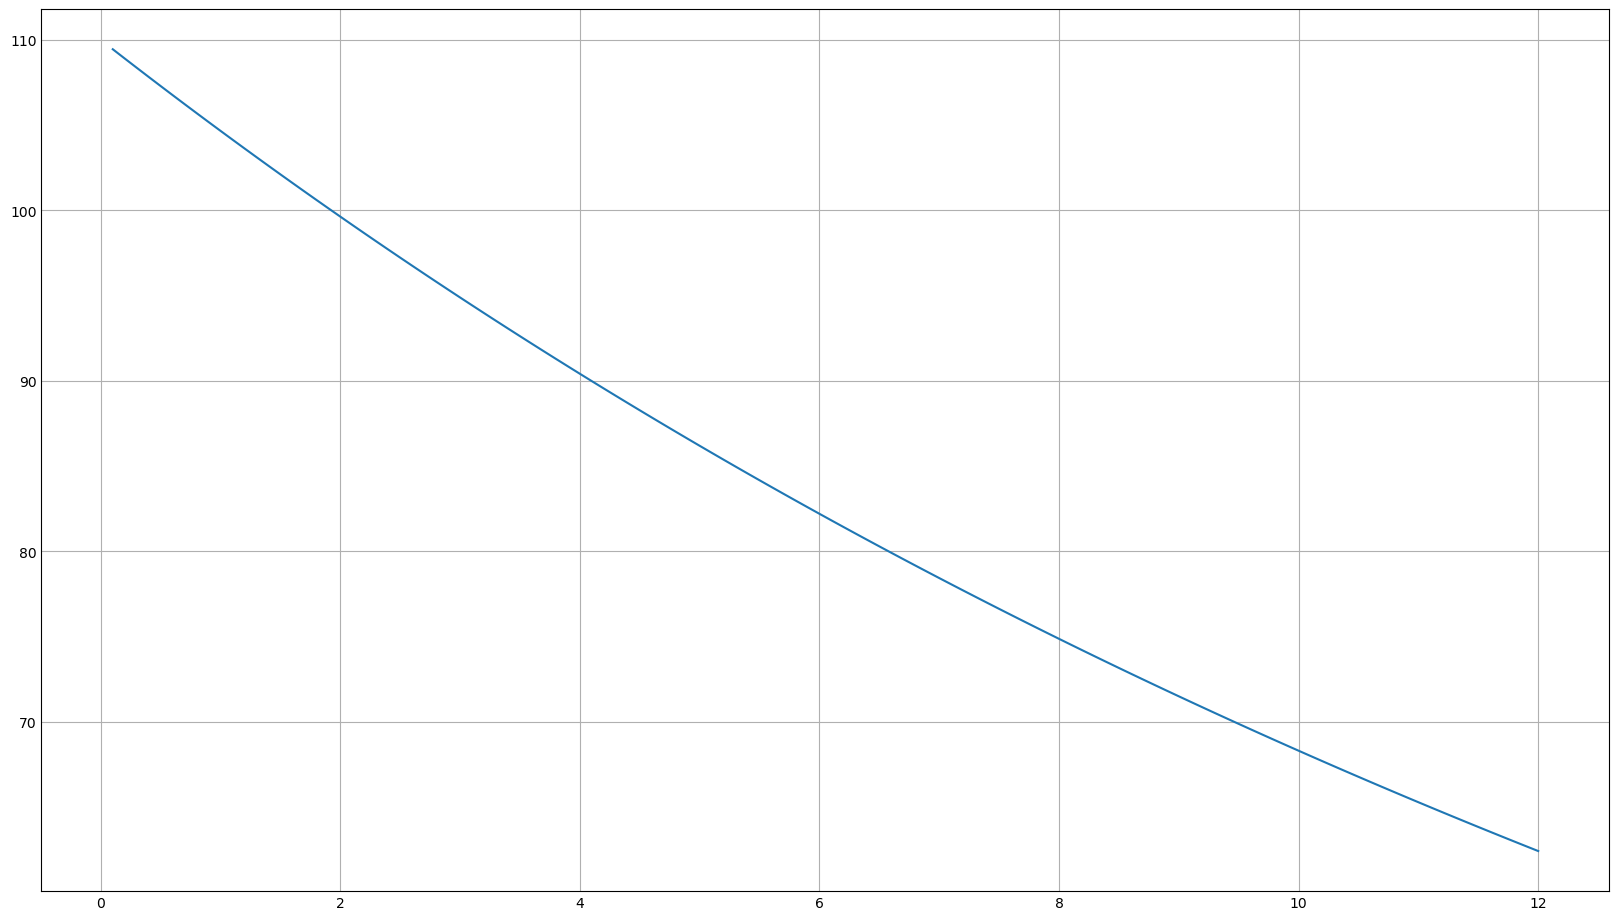

In [ ]:
x, y = r, FV

fig = plt.figure()
plt.style.use('_mpl-gallery')
ax = fig.subplots()
ax.plot(x, y)